# Trabalho de Física Computacional
Aluno: Wagner Martins de Lima Filho

## Lendo informações

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### a) Transforme a unidade das posicoes de Km para AU (1 AU = 149598000 Km)

In [23]:
df = np.loadtxt("./marsexpress.dat")
t = df[:,0]
x = df[:,1]
y = df[:,2]

AU = 149598000

x /= AU
y /= AU

print(x)
print(y)

[-0.18830348 -0.1873968  -0.18648999 ...  1.00020361  0.99978596
  0.99936904]
[-0.997312   -0.99749823 -0.99768373 ...  1.07090783  1.07139013
  1.07187148]


### b) A partir dos dados, faca um grafico da trajetoria y _versus_ x.

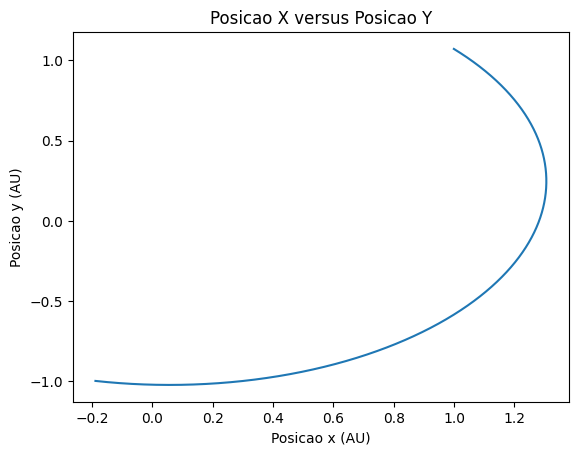

In [28]:
plt.plot(x,y)
plt.title("Posicao X versus Posicao Y")
plt.xlabel("Posicao x (AU)")
plt.ylabel("Posicao y (AU)")
plt.show()

### c) Calcule e faca o grafico da velocidade da sonda em funcao do tempo. Lembre-se que $v=\sqrt{v_x^2+v_y^2}$

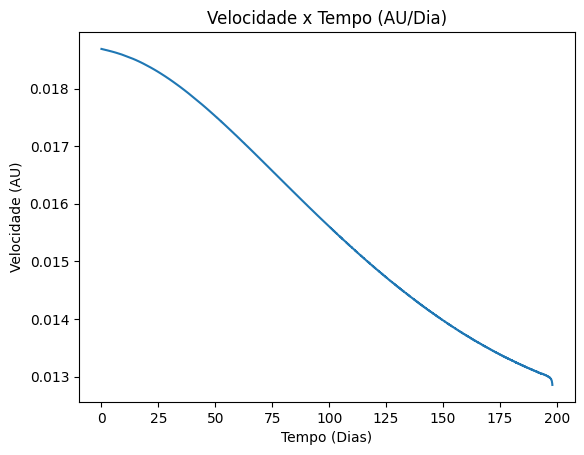

In [39]:
vx = (x[1:]-x[:-1])/(t[1:]-t[:-1])
vy = (y[1:]-y[:-1])/(t[1:]-t[:-1])

v = np.sqrt(vx**2+vy**2)

plt.plot(t[:-1], v)
plt.title("Velocidade x Tempo (AU/Dia)")
plt.xlabel("Tempo (Dias)")
plt.ylabel("Velocidade (AU)")
plt.show()

### d) Qual a velocidade da sonda ao chegar em marte?

In [46]:
# O ultimo instante de tempo, quando a sonda pousa em marte
print(v[-1]*(AU/24), "Km/h")

80140.98611448827 Km/h


## Problema 2

O periodo de um pendulo simples, onde vale a aproximacao de pequenas oscilacoes e dado por:
* T: Periodo
* L: Comprimento do Pendulo
$$T = 2\pi \sqrt{\frac{L}{g}}$$

Para o caso de grandes amplitudes, onde nao vale a aproximacao harmonica, o periodo e dado pela integral:
* $\tau$: Periodo
* $\theta$: Angulo
* $\theta_0$: Amplitude (deslocamento inicial)
* L: Comprimento do Pendulo
$$\tau = 2\sqrt{\frac{L}{g}}\int_0^{\theta_0}{[sen^2(\theta_0/2)-sen^2(\theta/2)]^{-\frac{1}{2}}}d\theta$$

In [49]:
def simpson_integral(f, a, b, n):
    h = (b-a)/n
    k = np.arange(1,(n/2)+1)
    return (1/3)*h*( f(a) + f(b) + 4*np.sum(f(a+(2*k-1)*h)) + 2*np.sum(f(a+2*(k[:-1])*h)) )

In [108]:
def periodo(theta0):
    def f(theta):
        return np.where(theta==theta0, 0, 1 / np.sqrt(np.sin(theta0/2)**2-np.sin(theta/2)**2))
    return 2*simpson_integral(f, 0, theta0, 1000)

### b) Considerando $\sqrt{\frac{L}{g}}=1$, utilize a funcao para calcular o $\tau$ para valores de $\theta_0$ entre $0\degree$ e $80\degree$ (nao esqueca de transformar os angulos para radianos). Faca entao o grafico $\tau$ em funcao de $\theta_0$. Na mesma figura, faca tambem o grafico de T (Equacao 1) em funcao de $\theta_0$ (utilize a linha pontilhada).

/tmp/ipykernel_5016/846570651.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return np.where(theta==theta0, 0, 1 / np.sqrt(np.sin(theta0/2)**2-np.sin(theta/2)**2))
/tmp/ipykernel_5016/846570651.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.where(theta==theta0, 0, 1 / np.sqrt(np.sin(theta0/2)**2-np.sin(theta/2)**2))


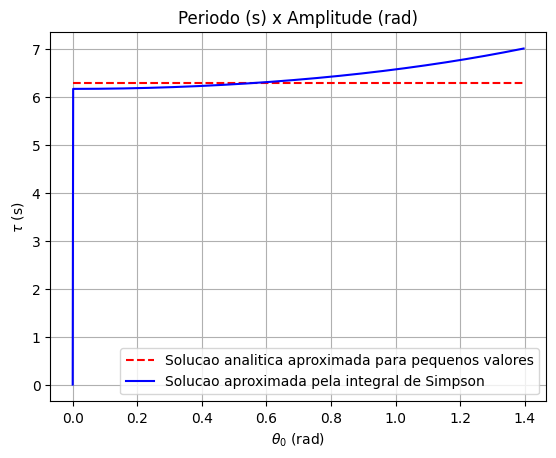

In [127]:
# Valores para Theta0
vtheta = np.linspace(0,80,1000)
vtheta = np.radians(vtheta)

# Eq. 1 constante 2pi
const = np.copy(vtheta)
const[:] = 2*np.pi

# Eq. 2 periodo tau
vtau = np.array([periodo(i) for i in vtheta])

plt.plot(vtheta,const, 'r--')
plt.plot(vtheta,vtau, 'b')
plt.title('Periodo (s) x Amplitude (rad)')
plt.legend(['Solucao analitica aproximada para pequenos valores','Solucao aproximada pela integral de Simpson'])
plt.xlabel(r'$\theta_0$ (rad)')
plt.ylabel(r'$\tau$ (s)')
plt.grid()
plt.show()

### c) Com base no seu grafico, responda: para qual valor maximo de $\theta_0$, podemos considerar uma aproximacao harmonica valida?

Pensando na forma analitica que rege sobre o intervalo de 0 a 1. Pode-se encontrar valores satisfatorios ate o ponto 1.

Por exemplo alguns valores abaixo:

In [129]:
eq1 = 2*np.pi
print(f"Eq. 1 (0.25): {eq1}\nEq. 2 (0.25): {periodo(0.25)}\n")
print(f"Eq. 1 (0.5): {eq1}\nEq. 2 (0.5): {periodo(0.5)}\n")
print(f"Eq. 1 (1): {eq1}\nEq. 2 (1): {periodo(1)}")

Eq. 1 (0.25): 6.283185307179586
Eq. 2 (0.25): 6.194642839328561

Eq. 1 (0.5): 6.283185307179586
Eq. 2 (0.5): 6.267814142222223

Eq. 1 (1): 6.283185307179586
Eq. 2 (1): 6.577243155802275


/tmp/ipykernel_5016/846570651.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return np.where(theta==theta0, 0, 1 / np.sqrt(np.sin(theta0/2)**2-np.sin(theta/2)**2))


No entanto quando os valores sao superiores, a diferenca se torna maior. O que pode ser verificado com o comando abaixo:

In [130]:
print(f"Eq. 1 (1.5): {eq1}\nEq. 2 (1.5): {periodo(1.5)}")

Eq. 1 (1.5): 6.283185307179586
Eq. 2 (1.5): 7.162805631464244


/tmp/ipykernel_5016/846570651.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return np.where(theta==theta0, 0, 1 / np.sqrt(np.sin(theta0/2)**2-np.sin(theta/2)**2))
